In [34]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [7]:
df = pd.read_csv("../../assets/datasets/airport2.csv")
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42


Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [11]:
le = LabelEncoder()
df["Airport"] = le.fit_transform(df["Airport"])
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,0,2004,242,235,71,46
1,0,2005,221,190,61,33
2,0,2006,392,329,71,124
3,0,2007,366,304,107,45
4,0,2008,333,300,79,42


## 2. Plot the data

In [31]:
df.Airport.unique()

array([0, 1, 2])

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [13]:
y = df["Airport"]
X = df.iloc[:,1:]

#### 3.2 Conduct the k-means clustering

In [40]:
kcluster = KMeans(n_clusters=3)
kcluster.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### 3.3 Compute the labels and centroids

In [41]:
labels = kcluster.labels_
centroids = kcluster.cluster_centers_
print labels
print centroids

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 1 1 0]
[[  2008.625        6646.75         7472.25          908.875         900.5       ]
 [  2009.29166667    471.875         526.66666667    140.375
      98.08333333]
 [  2005.          13837.          14480.            790.           1080.        ]]


In [42]:
metrics.silhouette_score(X, labels, metric="euclidean")

0.87758503272260813

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [43]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [44]:
y.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
accuracy_score(y,labels)

0.36363636363636365

In [46]:
confusion_matrix(y,labels)

array([[ 0, 11,  0],
       [ 0, 11,  0],
       [ 8,  2,  1]])

In [48]:
print classification_report(y,labels)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.46      1.00      0.63        11
          2       1.00      0.09      0.17        11

avg / total       0.49      0.36      0.27        33



**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [52]:
forest = ExtraTreesClassifier()
forest.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
importances = forest.feature_importances_

Feature ranking:
1. feature 1 (0.291367)
2. feature 3 (0.244322)
3. feature 2 (0.232335)
4. feature 4 (0.180099)
5. feature 0 (0.051878)


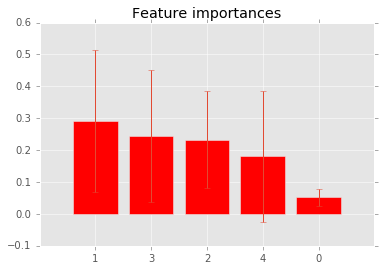

In [55]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 5. KNN Classifier

## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

In [58]:
Z = linkage(X, 'ward')
Z

array([[  1.30000000e+01,   1.40000000e+01,   1.65831240e+01,
          2.00000000e+00],
       [  6.00000000e+00,   8.00000000e+00,   1.95192213e+01,
          2.00000000e+00],
       [  4.00000000e+00,   7.00000000e+00,   2.35372046e+01,
          2.00000000e+00],
       [  0.00000000e+00,   9.00000000e+00,   2.81247222e+01,
          2.00000000e+00],
       [  1.70000000e+01,   2.00000000e+01,   2.99666481e+01,
          2.00000000e+00],
       [  1.00000000e+00,   3.40000000e+01,   3.18799833e+01,
          3.00000000e+00],
       [  1.80000000e+01,   1.90000000e+01,   3.26802693e+01,
          2.00000000e+00],
       [  1.60000000e+01,   3.30000000e+01,   3.62537354e+01,
          3.00000000e+00],
       [  1.00000000e+01,   3.50000000e+01,   4.44147123e+01,
          3.00000000e+00],
       [  2.10000000e+01,   3.70000000e+01,   5.47783412e+01,
          3.00000000e+00],
       [  5.00000000e+00,   3.80000000e+01,   5.70233870e+01,
          4.00000000e+00],
       [  3.00000000e

In [59]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.89007511488629476

#### 6.2 Plot the Denrogram

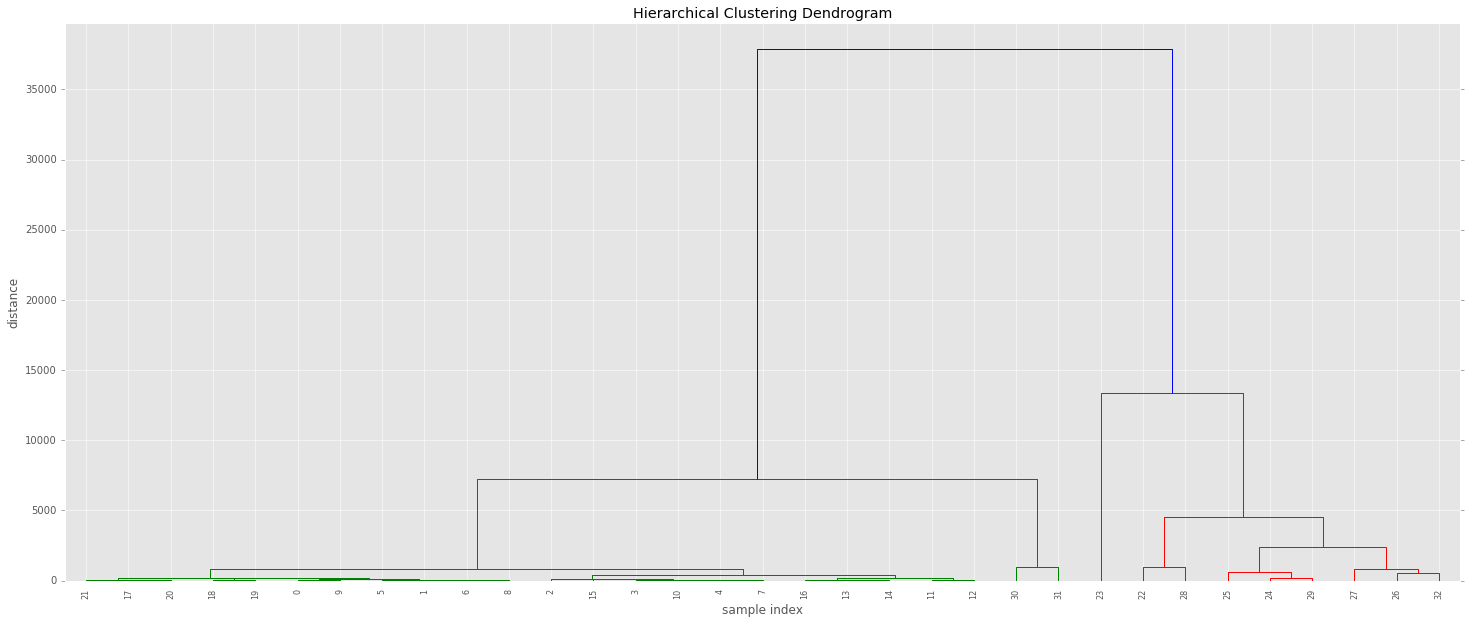

In [60]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## Extra Trees Classifier

## KNN Classifier